# Machine Learning Online Class - Exercise 1: Linear Regression

In this exercise, we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

## Part 1: Basic Function

To warm up, the `warm_up_exercise` function below returns a 5x5 identity matrix.

In [46]:
import numpy as np


def warm_up_exercise():
    """
    An example function that returns the 5x5 identity matrix.

    Returns
    -------
    I : ndarray
        of 5x5 identity matrix.
    """
    a = np.eye(5, dtype=int)
    return a

In [61]:
print 'Running warmUpExercise...'
print '5x5 Identity Matrix: '
print warm_up_exercise()

Running warmUpExercise...
5x5 Identity Matrix: 
[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


## Part 2: Plotting

Then load the data from `ex1data1.txt`. The data has only two properties: profit and population. 

In [48]:
data = np.loadtxt(open("ex1data1.txt", "r"), delimiter=",")
x = data[:, 0:1]
y = data[:, 1:2]
m = len(y)  # Number of training examples

The `plot_data` function below uses scatter plot to visualize the data.

In [49]:
import matplotlib.pyplot as plt


def plot_data(x, y, show=False):
    """
    Plots the data points x and y into a new figure.

    Parameters
    ----------
    x : array
        Data on x axis.
    y : array
        Data on y axis.
    show : bool
        True to show the plot immediately.
    """
    plt.figure()
    plt.plot(x, y, linestyle='', marker='x', color='r', label='Training data')
    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    if show:
        plt.show()

Plot and show the figure: 

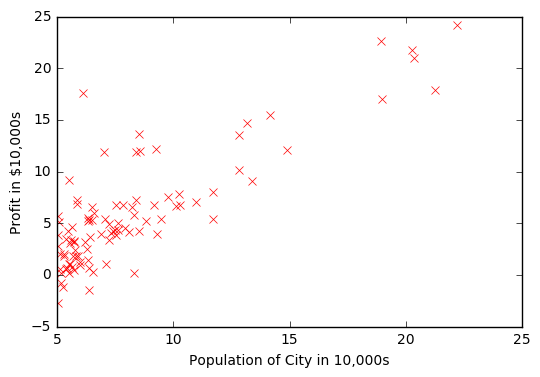

In [50]:
plot_data(x, y)
plt.show()

## Part 3: Gradient descent

In this part, we will fit the linear regression parameters to our dataset using gradient descent. 

Parameters are initialized as follows:

- Add a column of ones to x to accommodate the theta_0 intercept term: 

In [51]:
x = np.concatenate((np.ones((m, 1)), x), axis=1)  # Add a column of ones to x

- Initialize fitting parameters with zeros: 

In [52]:
theta = np.zeros((2, 1))

- Some gradient descent settings: 

In [53]:
iterations = 1500
alpha = 0.01

The `compute_cost` function below computes cost for linear regression.

In [54]:
def compute_cost(x, y, theta):
    """
    Compute cost for linear regression.

    Parameters
    ----------
    x : ndarray
        Training data. It's a m by n matrix, where m is the number of data samples and n is the number of features.
    y : ndarray
        Labels, m by 1 matrix.
    theta : ndarray
        Linear regression parameter, n by 1 matrix.

    Returns
    -------
    J : numpy.float64
        The cost of using theta as the parameter for linear regression to fit the data points in x and y.
    """
    m = len(y)
    j = np.sum(np.square(x.dot(theta) - y)) / (2 * m)

    return j

Compute and print the cost: 

In [56]:
cost = compute_cost(x, y, theta)
print 'The cost on initial theta:', cost

The cost on initial theta: 32.0727338775


The `gradient_descent` function below performs gradient descent to learn theta.

In [57]:
def gradient_descent(x, y, theta, alpha, num_iters):
    """
    Performs gradient descent to learn theta.

    Parameters
    ----------
    x : ndarray
        Training data. It's a m by n matrix, where m is the number of data samples and n is the number of features.
    y : ndarray
        Labels, m by 1 matrix.
    theta : ndarray
        Initial linear regression parameter, n by 1 matrix.
    alpha : float
        Learning rate.
    num_iters: int
        Number of iteration.

    Returns
    -------
    theta : ndarray
        Linear regression parameter, n by 1 matrix.
    j_history: ndarray
        Cost history, num_iters by 1 matrix.
    """
    m = len(y)
    j_history = np.zeros((num_iters, 1))

    for i in range(num_iters):
        theta -= alpha / m * (np.dot((np.dot(x, theta) - y).T, x)).T
        j_history[i] = compute_cost(x, y, theta)

    return theta, j_history

Run gradient descent and print the theta found by gradient descent: 

In [60]:
theta, j_history = gradient_descent(x, y, theta, alpha, iterations)
print "Theta found by gradient descent: \n", theta

Theta found by gradient descent: 
[[-3.89459687]
 [ 1.1929147 ]]


In [ ]:
Plot the linear fit: 

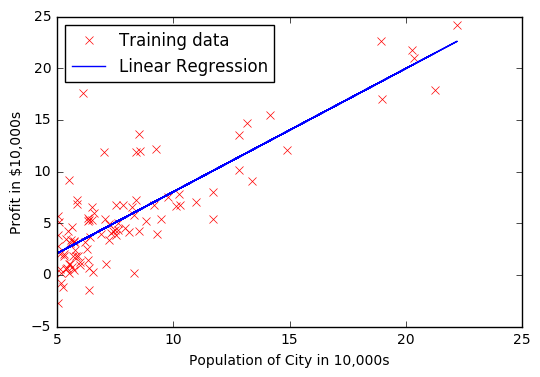

In [21]:
plot_data(x[:, 1], y)
plt.plot(x[:, 1], np.dot(x, theta), label='Linear Regression')
plt.legend(loc='upper left', numpoints=1)
plt.show()

Predict values for population sizes of 35,000 and 70,000: 

In [62]:
predict1 = np.dot(np.array([1, 3.5]), theta)
print "For population = 35,000, we predict a profit of", predict1 * 10000

predict2 = np.dot(np.array([1, 7]), theta)
print "For population = 70,000, we predict a profit of", predict2 * 10000

For population = 35,000, we predict a profit of [ 2806.04573641]
For population = 70,000, we predict a profit of [ 44558.06014739]


## Part 4: Visualizing J(theta_0, theta_1)

In this part we will plot the cost over a 2-dimensional grid of theta_0 and theta_1 values.

Grid over `theta0_vals` / `theta1_vals` and fill out `j_vals`:

In [63]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

j_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# Fill out j_vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([[theta0_vals[i], theta1_vals[j]]]).T
        j_vals[i, j] = compute_cost(x, y, t)

# We need to transpose J_vals before calling plot_surface, or else the axes will be flipped.
j_vals = j_vals.T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

Surface plot:

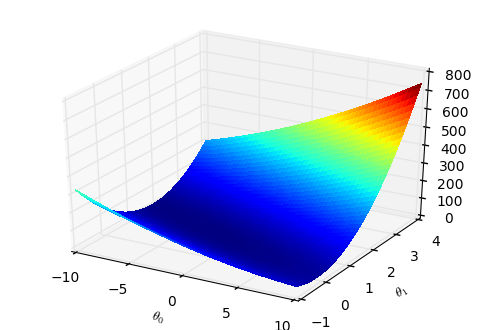

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, j_vals, rstride=2, cstride=2, cmap=cm.jet, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

plt.show()

Contour plot: 

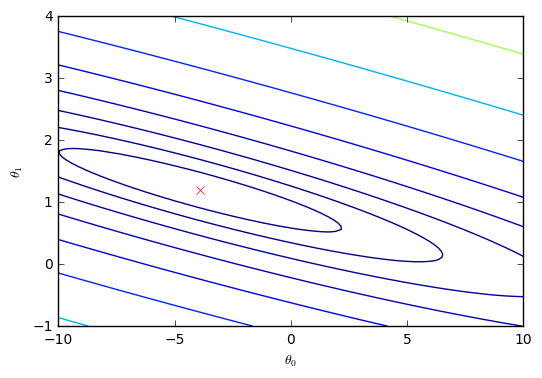

In [65]:
plt.figure()
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, j_vals, levels=np.logspace(-2, 3, 20))
plt.plot(theta[0], theta[1], linestyle='', marker='x', color='r')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

plt.show()